In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for get dataset from sklearn
from sklearn.datasets import load_iris
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris['feature_names']+['target']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [5]:
df=pd.DataFrame(np.concatenate((iris['data'],iris["target"].reshape(-1,1)) ,axis=1)
               ,columns=iris['feature_names']+['targrt'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targrt
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
df['targrt'].unique()

array([0., 1., 2.])

In [7]:
X=df.drop(columns=['targrt'] ,axis=1)
y=df['targrt']


In [8]:
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)

In [10]:
knn_clf =KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn_clf.fit( X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn_clf.predict(X_test)

In [14]:
data=pd.DataFrame(np.column_stack((y_test, y_pred)),columns=['Truth' ,'predicited'])
data

,Truth,predicited
0,1.0,1.0
1,0.0,0.0
2,2.0,2.0
3,1.0,1.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,2.0,2.0
8,1.0,1.0
9,1.0,1.0


In [16]:
accuracy_score(y_test, y_pred)

1.0

In [19]:
# Assuming 'y_test' and 'y_pred' are already defined
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

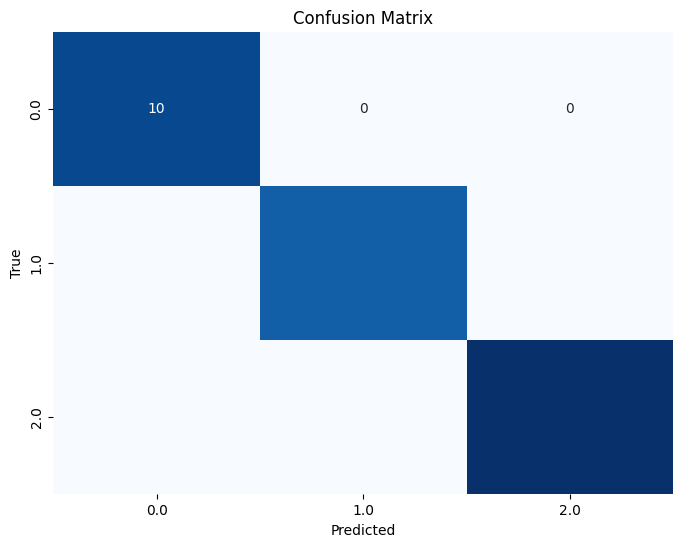

In [20]:
# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y), columns=np.unique(y))

# Plotting the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()